## TEAM 8 (Dataset - Anime Recommendations Database)

### 202211032 Dhruvi Shah

### 202211047 Samaksh Gupta

### 202211048 Krishna Veer Singh

### 202211049 Madhavi Aghera

In [ ]:
## Database Phase
import pandas as pd
import numpy as np

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
## Database Phase
import pandas as pd
import numpy as np

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d CooperUnion/anime-recommendations-database

 40% 10.0M/25.0M [00:00<00:00, 103MB/s]
100% 25.0M/25.0M [00:00<00:00, 170MB/s]


In [ ]:
!unzip anime-recommendations-database.zip

Archive:  anime-recommendations-database.zip
  inflating: anime.csv               
  inflating: rating.csv              


In [ ]:
anime_data=pd.read_csv('/content/anime.csv')
rating_data=pd.read_csv('/content/rating.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [ ]:
print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the  data is (row, column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


## Dataset Details

### 1)anime_data:

* **anime_id** - myanimelist.net's unique id identifying an anime.
* **name** - full name of anime.
* **genre** - comma separated list of genres for this anime.
* **type** - movie, TV, OVA, etc.
* **episodes** - how many episodes in this show. (1 if movie).
* **rating** - average rating out of 10 for this anime.
* **members** - number of community members that are in this anime's "group".

### 2)rating_data:

* **user_id** - non identifiable randomly generated user id.
* **anime_id** - the anime that this user has rated.
* **rating** - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

#Merging dataframes

In [ ]:
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()


,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1



# Analyze the data

## Top 10 Anime based on rating counts


Text(0, 0.5, 'User Rating count')

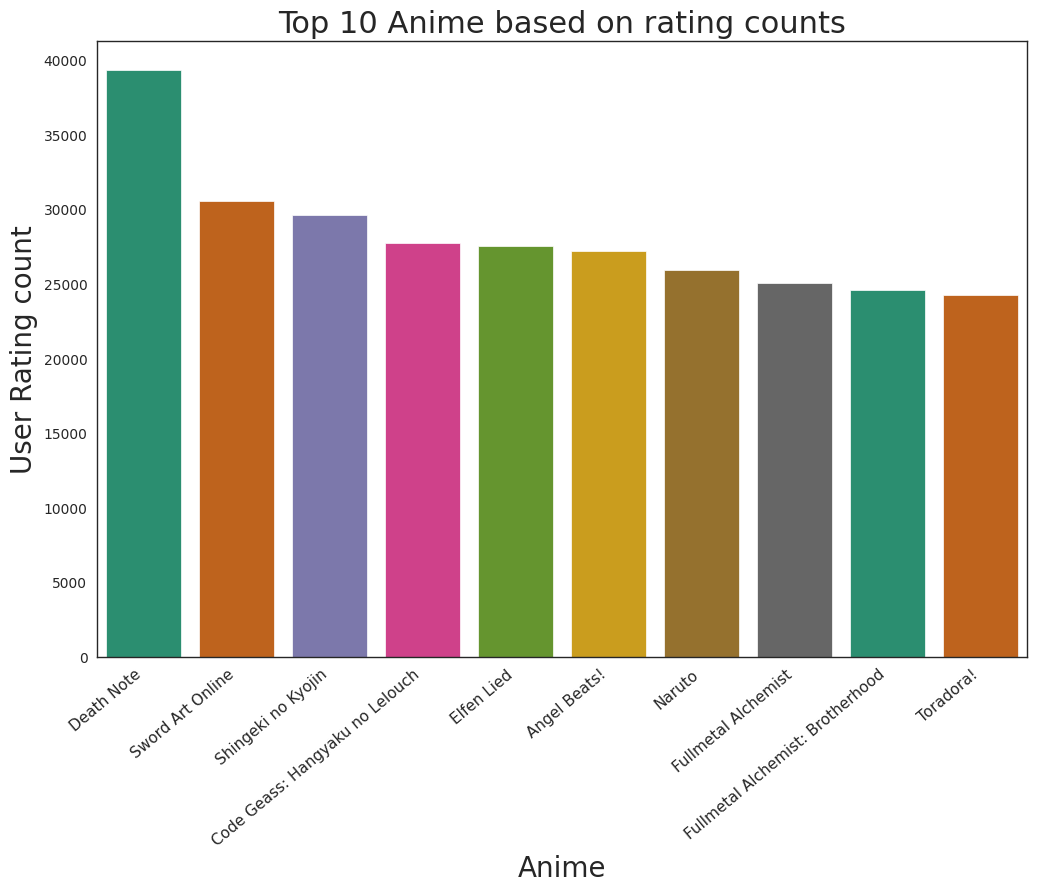

In [ ]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )


top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

In [ ]:
anime_fulldata = anime_fulldata.merge(anime_ratingCount, left_on = 'anime_title', right_on = 'anime_title', how = 'left')
anime_fulldata = anime_fulldata.rename(columns={'user_rating_x': 'user_rating', 'user_rating_y': 'totalratingcount'})

In [ ]:
anime_fulldata.head(10)

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1,2199
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,2199
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,2199
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,2199
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,2199
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,2199


In [ ]:
anime_fulldata.shape

(7813727, 10)

## Top 10 Anime based on Community size

In [ ]:
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title", 
                     keep = 'first', inplace = True)

Text(0, 0.5, 'Community Size')

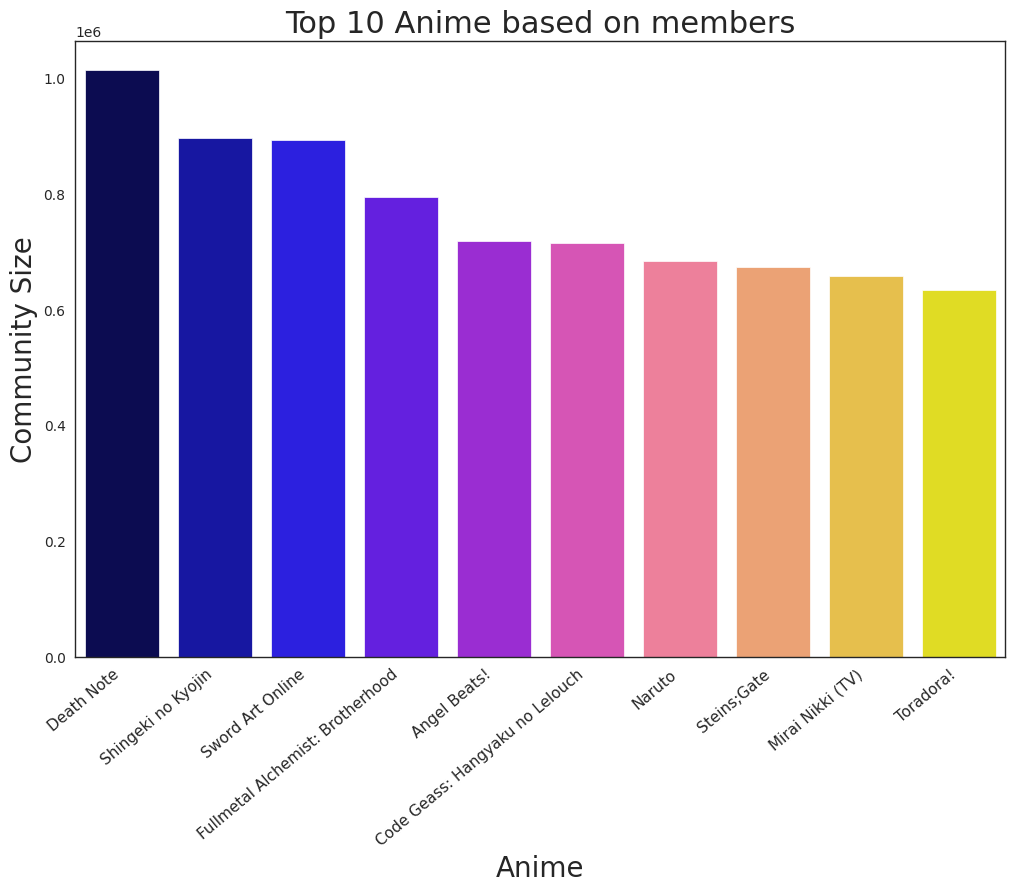

In [ ]:
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

In [ ]:
top10_animemembers

,anime_title,members
344257,Death Note,1013917
568937,Shingeki no Kyojin,896229
3160072,Sword Art Online,893100
2199,Fullmetal Alchemist: Brotherhood,793665
1007977,Angel Beats!,717796
159820,Code Geass: Hangyaku no Lelouch,715151
3277902,Naruto,683297
28159,Steins;Gate,673572
2127656,Mirai Nikki (TV),657190
856698,Toradora!,633817


## Distribution of ratings
#### distribution of ratings on both the datasets. I beleive the rating from anime.csv is from review websites and user_rating in rating.csv is from user id's

Text(0.5, 1.0, 'Rating of users')

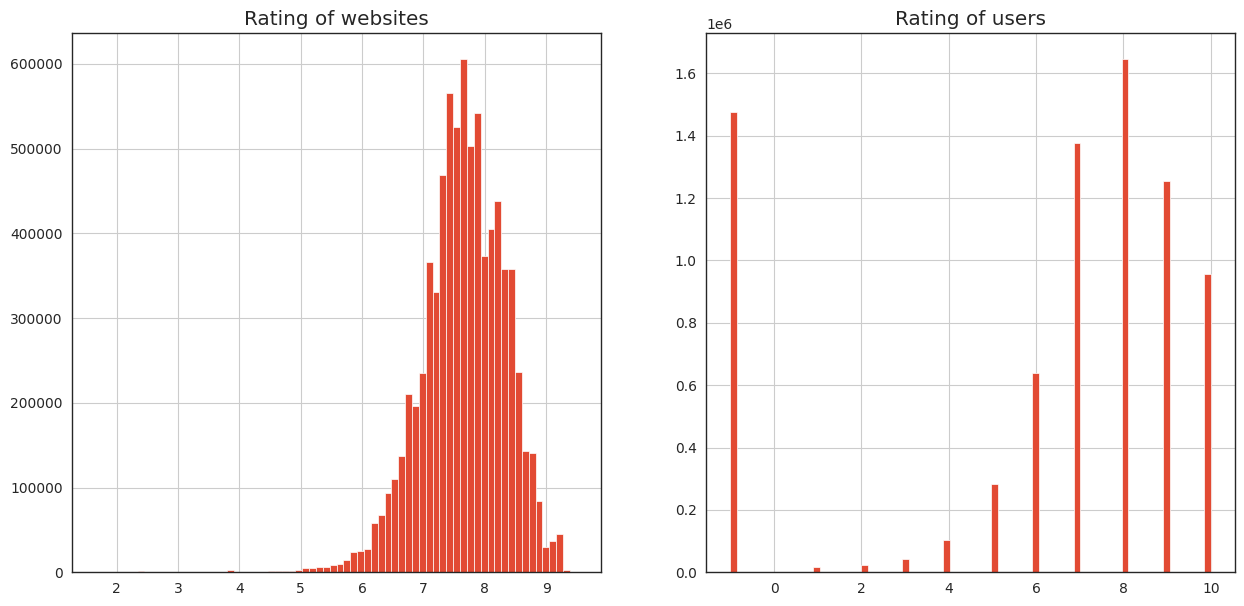

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Rating of users")

**Insights:**
* Most of the ratings are spread between 6-10
* The mode of the distribution is around 7.5-8.0
* Both the distribution are left skewed
* We have -1 rating as an outlier in rating of users which can be made into NaN

## Medium of streaming 

In [ ]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

**Insights:**
* 67.6% of the anime's were aired on TV followed by 13.5% through Movie
* 10.2% of anime's are streamed as OVA which is greater than ONA(1.18%)

## Genre Word Cloud

(-0.5, 799.5, 399.5, -0.5)

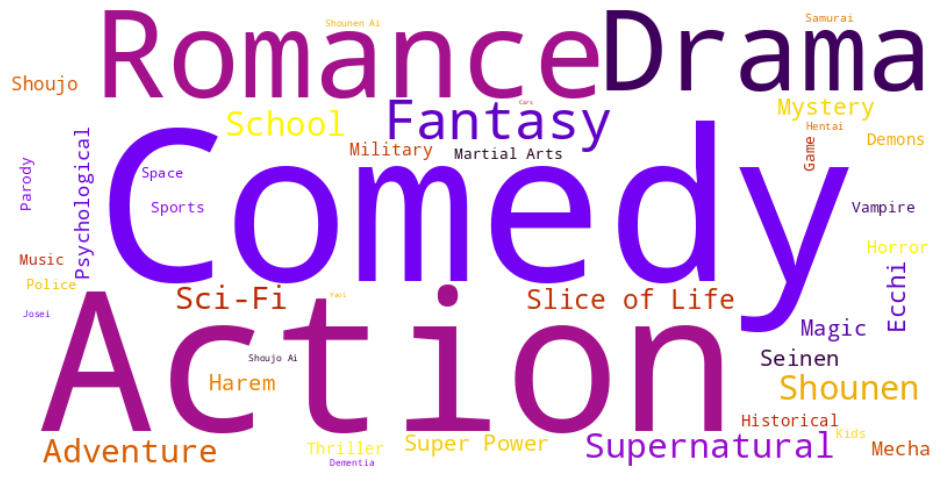

In [ ]:
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

We can sense there are many Comedy genre anime's followd by action, romance,drama in our dataset


<a id="section-four"></a>

### a) Handling NaN values


In [ ]:
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN,2199


In [ ]:
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()

anime_id            0
anime_title         0
genre               0
type                0
episodes            0
rating              0
members             0
user_id             0
user_rating         0
totalratingcount    0
dtype: int64

### b) Filtering user_id


In [ ]:
anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: user_id, Length: 69600, dtype: int64

In [ ]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

### c) Pivot


In [ ]:
anime_feature['anime_title'] = anime_feature['anime_title'].str.replace('&quot;', '"')

In [ ]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,210,226,233,235,244,248,250,256,261,271,282,288,294,301,308,317,321,326,341,352,385,392,395,418,428,436,438,439,446,455,460,462,478,492,497,500,511,529,530,531,540,541,547,551,553,565,567,572,573,578,585,593,598,611,634,637,656,659,660,661,662,670,680,687,692,694,702,721,735,741,746,750,762,768,771,774,783,784,786,795,799,806,813,814,819,820,847,861,890,894,916,920,926,936,937,943,946,954,958,963,979,995,996,1013,1019,1020,1031,1044,1058,1084,1103,1114,1116,1119,1132,1140,1145,1163,1169,1176,1190,1191,1195,1202,1210,1213,1216,1222,1223,1235,1237,1244,1274,1280,1284,1287,1306,1309,1324,1327,1332,1344,1349,1354,1366,1378,1396,1400,1404,1410,1418,1419,1425,1435,1441,1442,1450,1456,1482,1497,1501,1504,1522,1530,1541,1549,1551,1558,1570,1576,1578,1585,1589,1600,1605,1619,1620,1623,1647,1651,1689,1695,1697,1701,1705,1711,1720,1734,1737,1753,1771,1786,1788,1797,1798,1807,1811,1822,1835,1842,1843,1844,1847,1853,1854,1888,1890,1913,1918,1929,1937,1938,1947,1954,1957,1963,1984,1987,2016,2021,2025,2050,2102,2113,2115,2118,2125,2141,2165,2194,2200,2204,2212,2246,2268,2273,2290,2297,2298,2300,...,70832,70838,70839,70842,70844,70879,70881,70884,70888,70931,70938,70953,70961,70998,71008,71016,71021,71029,71078,71115,71118,71122,71178,71184,71198,71212,71224,71225,71226,71231,71250,71252,71253,71278,71284,71300,71302,71330,71339,71362,71363,71377,71429,71435,71438,71453,71456,71466,71491,71498,71508,71529,71537,71564,71573,71607,71610,71619,71632,71655,71673,71699,71731,71739,71749,71754,71766,71770,71780,71790,71792,71794,71796,71804,71808,71812,71816,71817,71821,71822,71844,71850,71854,71862,71877,71882,71893,71896,71898,71901,71908,71932,71942,71943,71945,71947,71951,71968,71971,71973,71974,71977,71984,71999,72007,72021,72035,72042,72043,72049,72052,72059,72060,72095,72107,72115,72126,72130,72196,72254,72263,72264,72268,72294,72305,72306,72317,72329,72400,72404,72409,72468,72511,72512,72516,72520,72526,72528,72541,72549,72554,72610,72627,72630,72646,72661,72663,72677,72685,72694,72715,72759,72760,72767,72776,72786,72787,72789,72800,72811,72814,72817,72846,72857,72872,72875,72884,72889,72928,72941,72945,72946,72947,72954,72959,72960,72968,72997,73005,73012,73031,73058,73070,73073,73075,73086,73088,73099,73101,73111,73114,73123,73132,73135,73152,73153,73155,73159,73160,73162,73177,73179,73188,73193,73197,73203,73212,73216,73221,73234,73248,73251,73257,73260,73262,73264,73272,73276,73278,73282,73284,73286,73288,73301,73317,73320,73328,73329,73340,73341,73343,73346,73356,73359,73362,73378,73379,73380,73389,73395,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
anime_pivot.shape

(9785, 8713)

In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(anime_pivot, f)

<a id="section-five"></a>
# Recommendation -

## Collaborative Filtering using KNN (with metric as Cosine Similarity)

In [ ]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


8740


In [ ]:
df=anime_pivot.reset_index(drop=False)

In [ ]:
df.head()

user_id,anime_title,5,7,17,38,43,46,123,129,139,160,210,226,233,235,244,248,250,256,261,271,282,288,294,301,308,317,321,326,341,352,385,392,395,418,428,436,438,439,446,455,460,462,478,492,497,500,511,529,530,531,540,541,547,551,553,565,567,572,573,578,585,593,598,611,634,637,656,659,660,661,662,670,680,687,692,694,702,721,735,741,746,750,762,768,771,774,783,784,786,795,799,806,813,814,819,820,847,861,890,894,916,920,926,936,937,943,946,954,958,963,979,995,996,1013,1019,1020,1031,1044,1058,1084,1103,1114,1116,1119,1132,1140,1145,1163,1169,1176,1190,1191,1195,1202,1210,1213,1216,1222,1223,1235,1237,1244,1274,1280,1284,1287,1306,1309,1324,1327,1332,1344,1349,1354,1366,1378,1396,1400,1404,1410,1418,1419,1425,1435,1441,1442,1450,1456,1482,1497,1501,1504,1522,1530,1541,1549,1551,1558,1570,1576,1578,1585,1589,1600,1605,1619,1620,1623,1647,1651,1689,1695,1697,1701,1705,1711,1720,1734,1737,1753,1771,1786,1788,1797,1798,1807,1811,1822,1835,1842,1843,1844,1847,1853,1854,1888,1890,1913,1918,1929,1937,1938,1947,1954,1957,1963,1984,1987,2016,2021,2025,2050,2102,2113,2115,2118,2125,2141,2165,2194,2200,2204,2212,2246,2268,2273,2290,2297,2298,...,70832,70838,70839,70842,70844,70879,70881,70884,70888,70931,70938,70953,70961,70998,71008,71016,71021,71029,71078,71115,71118,71122,71178,71184,71198,71212,71224,71225,71226,71231,71250,71252,71253,71278,71284,71300,71302,71330,71339,71362,71363,71377,71429,71435,71438,71453,71456,71466,71491,71498,71508,71529,71537,71564,71573,71607,71610,71619,71632,71655,71673,71699,71731,71739,71749,71754,71766,71770,71780,71790,71792,71794,71796,71804,71808,71812,71816,71817,71821,71822,71844,71850,71854,71862,71877,71882,71893,71896,71898,71901,71908,71932,71942,71943,71945,71947,71951,71968,71971,71973,71974,71977,71984,71999,72007,72021,72035,72042,72043,72049,72052,72059,72060,72095,72107,72115,72126,72130,72196,72254,72263,72264,72268,72294,72305,72306,72317,72329,72400,72404,72409,72468,72511,72512,72516,72520,72526,72528,72541,72549,72554,72610,72627,72630,72646,72661,72663,72677,72685,72694,72715,72759,72760,72767,72776,72786,72787,72789,72800,72811,72814,72817,72846,72857,72872,72875,72884,72889,72928,72941,72945,72946,72947,72954,72959,72960,72968,72997,73005,73012,73031,73058,73070,73073,73075,73086,73088,73099,73101,73111,73114,73123,73132,73135,73152,73153,73155,73159,73160,73162,73177,73179,73188,73193,73197,73203,73212,73216,73221,73234,73248,73251,73257,73260,73262,73264,73272,73276,73278,73282,73284,73286,73288,73301,73317,73320,73328,73329,73340,73341,73343,73346,73356,73359,73362,73378,73379,73380,73389,73395,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
df[df['anime_title'] == '\"Bungaku Shoujo\" Kyou no Oyatsu: Hatsukoi'].iloc[0, 1:].values

array([0.0, 0.0, 0.0, ..., 10.0, 0.0, 0.0], dtype=object)

In [ ]:
anime_pivot.iloc[query_index,:].values.reshape(1, -1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Tobira wo Akete:

1: Mirai Choujuu Fobia, with distance of 0.6208637899406546:
2: Chou Kousoku Galvion, with distance of 0.6249116344989893:
3: Hiiro no Koku, with distance of 0.6264072229171016:
4: G.T.R G-cup Teacher Rei, with distance of 0.6340502357366141:
5: Mujintou Monogatari X, with distance of 0.6504916962940019:


## Content based filtering

### a) Cleaning anime_title


In [ ]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

### b) Term Frequency (TF) and Inverse Document Frequency (IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [ ]:
tfv_matrix.shape

(12294, 1554)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

In [ ]:
def give_rec(title, sig=sig):
    idx = indices[title]

    sig_scores = list(enumerate(sig[idx]))

    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    sig_scores = sig_scores[1:11]

    anime_indices = [i[0] for i in sig_scores]

    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})

In [ ]:
give_rec('Naruto: Shippuuden')

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


In [ ]:
give_rec('Steins;Gate')

,Anime name,Rating
0,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.61
1,Steins;Gate: Oukoubakko no Poriomania,8.46
2,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.34
3,Steins;Gate 0,NaN
4,Under the Dog,6.55
5,Loups=Garous,6.43
6,Loups=Garous Pilot,5.87
7,Ibara no Ou,7.24
8,Arve Rezzle: Kikaijikake no Yousei-tachi,6.44
9,Higashi no Eden,8.03


In [ ]:
give_rec('Shingeki no Kyojin')

,Anime name,Rating
0,Shingeki no Kyojin OVA,7.88
1,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,7.75
2,Shingeki no Kyojin Movie 1: Guren no Yumiya,7.70
3,Shingeki no Kyojin: Ano Hi Kara,6.96
4,Shingeki no Kyojin Season 2,NaN
5,One Piece,8.58
6,One Piece: Episode of Merry - Mou Hitori no Na...,8.29
7,One Piece: Episode of Nami - Koukaishi no Nami...,8.27
8,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.78
9,Dragon Ball Specials,6.96


In [ ]:
give_rec('One Piece')

,Anime name,Rating
0,One Piece: Episode of Merry - Mou Hitori no Na...,8.29
1,One Piece: Episode of Nami - Koukaishi no Nami...,8.27
2,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.78
3,One Piece Film: Strong World,8.42
4,One Piece Film: Z,8.39
5,One Piece Film: Gold,8.32
6,One Piece: Heart of Gold,7.75
7,Digimon Frontier,7.25
8,Digimon Tamers,7.65
9,Digimon Savers,7.10


In [ ]:
give_rec('Dragon Ball Z')

,Anime name,Rating
0,Dragon Ball Kai (2014),8.01
1,Dragon Ball Kai,7.95
2,Dragon Ball Z Movie 15: Fukkatsu no F,7.55
3,Dragon Ball Super,7.40
4,Dragon Ball Z: Summer Vacation Special,7.05
5,Dragon Ball Z: Atsumare! Gokuu World,6.76
6,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,6.75
7,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,6.28
8,Dragon Ball,8.16
9,Dragon Ball Z Movie 14: Kami to Kami,7.62


# SVD

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
animeT=anime_pivot.T
matrix = animeT.values

# Convert the data type of the rating matrix to float
matrix = matrix.astype(float)

# Apply SVD on the rating matrix to get the latent factors
U, sigma, Vt = svds(matrix, k=10)
sigma = np.diag(sigma)

# Predict the ratings for each user-item pair using the dot product of U, sigma, and Vt
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Define a function to recommend items for a given user
def recommend_items(user_id, predicted_ratings, num_recommendations=10):
    # Get the user's predicted ratings
    user_ratings = predicted_ratings[user_id]
    print(user_ratings.shape)
    # Sort the ratings in descending order and return the top n items
    sorted_ratings = user_ratings.argsort()[::-1]
    top_n_items = sorted_ratings[:num_recommendations]
    return top_n_items



In [ ]:
# Test the recommendation function for a sample user
user_id = 4
recommendations = recommend_items(user_id, all_user_predicted_ratings, num_recommendations=10)
print(f'Recommended items for user {user_id}: {recommendations}')


(9785,)
Recommended items for user 4: [5196 2878  235 6172 4901 8772  868 8306 9716 6564]


In [ ]:
for i in recommendations:
  name= animeT.columns[i]
  print(name)
     

Mahouka Koukou no Rettousei
Guilty Crown
Akame ga Kill!
No Game No Life
Log Horizon
Tokyo Ghoul
Black Bullet
Sword Art Online
Zetsuen no Tempest
Overlord


# Reranking

In [ ]:
from lightgbm import LGBMRanker


In [ ]:
popular_genres = ['Comedy',
 'Action',
 'Fantasy',
 'Adventure',
 'Kids',
 'Drama',
 'Sci-Fi',
 'Music',
 'Shounen',
 'Slice of Life']

In [ ]:
from tabulate import tabulate
from functools import wraps

def print_tabulate(df):
        if isinstance(df, pd.DataFrame):
            print(tabulate(df, headers='keys', tablefmt='psql'))
        else:
            return df

In [ ]:
anime_info_df = pd.read_csv('anime_info.csv')
relavence_scores = pd.read_csv('relavence_scores.csv')
user_info = pd.read_csv('user_info.csv')

In [ ]:
relavence_scores = relavence_scores[~(relavence_scores['user_id']==11100)]

In [ ]:
anime_info_df.head()

,anime_id,Genres,is_tv,year_aired,is_adult,above_five_star_users,above_five_star_ratings,above_five_star_ratio
0,1,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",1,1998.0,1,4012.0,4012.0,0.594018
1,5,"Action, Drama, Mystery, Sci-Fi, Space",0,2001.0,1,NaN,NaN,NaN
2,6,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",1,1998.0,0,NaN,NaN,NaN
3,7,"Action, Mystery, Police, Supernatural, Drama, ...",1,2002.0,0,NaN,NaN,NaN
4,8,"Adventure, Fantasy, Shounen, Supernatural",1,2004.0,0,76.0,76.0,0.481013


In [ ]:
popular_genres = ['Comedy',
 'Action',
 'Fantasy',
 'Adventure',
 'Kids',
 'Drama',
 'Sci-Fi',
 'Music',
 'Shounen',
 'Slice of Life']

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

def create_genre_flags(df, popular_genres):
    df = df.dropna(subset=['Genres'])
    df['Genres'] = df['Genres'].apply(lambda x:",".join(s.strip() for s in x.split(",")))
    # use MultiLabelBinarizer to create a one-hot encoded dataframe of the genres
    mlb = MultiLabelBinarizer()
    genre_df = pd.DataFrame(mlb.fit_transform(df['Genres'].str.split(',')),
                            columns=mlb.classes_,
                            index=df.index)
    # create a new dataframe with the movie id and genre columns
    new_df = pd.concat([df['anime_id'], genre_df[popular_genres]], axis=1)
    new_df.columns = ['anime_id'] + popular_genres
    return new_df

In [ ]:
anime_genre_info_df = create_genre_flags(anime_info_df,popular_genres)

In [ ]:
anime_info_df_final = anime_info_df.merge(anime_genre_info_df,on='anime_id')

In [ ]:
del anime_info_df_final['Genres']

In [ ]:
anime_info_df_final.columns = [col if col=='anime_id' else f"ANIME_FEATURE {col}".upper() for col in anime_info_df_final.columns]

In [ ]:
user_info.columns = [col if col=='user_id' else f"USER_FEATURE {col}".upper() for col in user_info.columns]

In [ ]:
def create_histogram(data, xname, n_bins=100, background_color='#F3F3F3', title=None):
    
    import matplotlib as mpl
    mpl.rcParams['font.size'] = 15
    mpl.rcParams['font.family'] = 'sans-serif'
    # mpl.rcParams['font.weight'] = 'semibold'

    plt.figure(figsize=(10,8))
    plt.hist(data, bins=n_bins, color='#2596be', edgecolor='black')
    plt.xlabel(xname)
    plt.ylabel('Frequency')
    ax = plt.gca()
    ax.set_facecolor(background_color)
    plt.grid(True, which='both', color='lightgray', linewidth=0.5)
    plt.title(title.upper(),fontweight='semibold',fontfamily='sans-serif')
    plt.show()

In [ ]:
train_interim = relavence_scores.merge(anime_info_df_final)
train = train_interim.merge(user_info,how='inner')

In [ ]:
na_counts = (train.isna().sum() * 100/len(train))

In [ ]:
train_processed = train.drop(na_counts[na_counts > 50].index,axis=1)

In [ ]:
train_processed.sort_values(by='user_id',inplace=True)

In [ ]:
train_processed.columns

Index(['anime_id', 'Name', 'user_id', 'relavence_score', 'ANIME_FEATURE IS_TV',
       'ANIME_FEATURE YEAR_AIRED', 'ANIME_FEATURE IS_ADULT',
       'ANIME_FEATURE ABOVE_FIVE_STAR_USERS',
       'ANIME_FEATURE ABOVE_FIVE_STAR_RATINGS',
       'ANIME_FEATURE ABOVE_FIVE_STAR_RATIO', 'ANIME_FEATURE COMEDY',
       'ANIME_FEATURE ACTION', 'ANIME_FEATURE FANTASY',
       'ANIME_FEATURE ADVENTURE', 'ANIME_FEATURE KIDS', 'ANIME_FEATURE DRAMA',
       'ANIME_FEATURE SCI-FI', 'ANIME_FEATURE MUSIC', 'ANIME_FEATURE SHOUNEN',
       'ANIME_FEATURE SLICE OF LIFE', 'USER_FEATURE REVIEW_COUNT',
       'USER_FEATURE AVG_SCORE', 'USER_FEATURE SCORE_STDDEV',
       'USER_FEATURE ABOVE_FIVE_STAR_COUNT',
       'USER_FEATURE ABOVE_FIVE_STAR_RATIO'],
      dtype='object')

In [ ]:
train_processed.set_index("user_id",inplace=True)

In [ ]:
features = ['ANIME_FEATURE IS_TV',
       'ANIME_FEATURE YEAR_AIRED', 'ANIME_FEATURE IS_ADULT',
       'ANIME_FEATURE ABOVE_FIVE_STAR_USERS',
       'ANIME_FEATURE ABOVE_FIVE_STAR_RATINGS',
       'ANIME_FEATURE ABOVE_FIVE_STAR_RATIO', 'ANIME_FEATURE COMEDY',
       'ANIME_FEATURE ACTION', 'ANIME_FEATURE FANTASY',
       'ANIME_FEATURE ADVENTURE', 'ANIME_FEATURE KIDS', 'ANIME_FEATURE DRAMA',
       'ANIME_FEATURE SCI-FI', 'ANIME_FEATURE MUSIC', 'ANIME_FEATURE SHOUNEN',
       'ANIME_FEATURE SLICE OF LIFE', 'USER_FEATURE REVIEW_COUNT',
       'USER_FEATURE AVG_SCORE', 'USER_FEATURE SCORE_STDDEV',
       'USER_FEATURE ABOVE_FIVE_STAR_COUNT',
       'USER_FEATURE ABOVE_FIVE_STAR_RATIO']

In [ ]:
target = 'relavence_score'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score,coverage_error

In [ ]:
test_size = int(1e5)
X,y = train_processed[features],train_processed[target].apply(lambda x:int(x*10))
test_idx_start = len(X)-test_size

xtrain,xtest,ytrain,ytest = X.iloc[0:test_idx_start],X.iloc[test_idx_start:],y.iloc[0:test_idx_start],y.iloc[test_idx_start:]

In [ ]:
get_group_size = lambda df: df.reset_index().groupby("user_id")['user_id'].count()

In [ ]:
train_groups = get_group_size(xtrain)
test_groups = get_group_size(xtest)

In [ ]:
sum(train_groups) , sum(test_groups)

(4764372, 100000)

In [ ]:
model = LGBMRanker(objective="lambdarank",n_estimators=20)
model.fit(xtrain,ytrain,group=train_groups,eval_set=[(xtest,ytest)],eval_group=[test_groups],eval_metric=['map'])

[1]	valid_0's map@1: 0.863354	valid_0's map@2: 0.84705	valid_0's map@3: 0.825397	valid_0's map@4: 0.816447	valid_0's map@5: 0.809951	valid_0's ndcg@1: 0.854927	valid_0's ndcg@2: 0.857799	valid_0's ndcg@3: 0.849489	valid_0's ndcg@4: 0.845283	valid_0's ndcg@5: 0.844731
[2]	valid_0's map@1: 0.875776	valid_0's map@2: 0.863354	valid_0's map@3: 0.8505	valid_0's map@4: 0.832665	valid_0's map@5: 0.829016	valid_0's ndcg@1: 0.860415	valid_0's ndcg@2: 0.870321	valid_0's ndcg@3: 0.867802	valid_0's ndcg@4: 0.857057	valid_0's ndcg@5: 0.857424
[3]	valid_0's map@1: 0.881988	valid_0's map@2: 0.865683	valid_0's map@3: 0.848948	valid_0's map@4: 0.833053	valid_0's map@5: 0.823736	valid_0's ndcg@1: 0.866627	valid_0's ndcg@2: 0.87533	valid_0's ndcg@3: 0.867993	valid_0's ndcg@4: 0.859304	valid_0's ndcg@5: 0.854882
[4]	valid_0's map@1: 0.872671	valid_0's map@2: 0.863354	valid_0's map@3: 0.844979	valid_0's map@4: 0.835706	valid_0's map@5: 0.830455	valid_0's ndcg@1: 0.857352	valid_0's ndcg@2: 0.867246	valid_0's

LGBMRanker(n_estimators=20, objective='lambdarank')

In [ ]:
user_2_anime_df = relavence_scores.groupby("user_id").agg({"anime_id":lambda x:list(set(x))})

In [ ]:
user_2_anime_map = dict(zip(user_2_anime_df.index,user_2_anime_df['anime_id']))

In [ ]:
candidate_pool = anime_info_df_final['anime_id'].unique().tolist()

In [ ]:
def candidate_generation(user_id,candidate_pool,user_2_anime_map,N):
    already_interacted = user_2_anime_map[user_id]
    candidates = list(set(candidate_pool) - set(already_interacted))
    return already_interacted,np.random.choice(candidates,size=N)

In [ ]:
anime_id_2_name = relavence_scores.drop_duplicates(subset=["anime_id","Name"])[['anime_id',"Name"]]
anime_id_2_name_map = dict(zip(anime_id_2_name['anime_id'],anime_id_2_name['Name']))
anime_id_2_name_map[1]

'Cowboy Bebop'

In [ ]:
def generate_predictions(user_id,user_2_anime_map,candidate_pool,feature_columns,anime_id_2_name_map,ranker,N=100):
    already_liked,candidates = candidate_generation(user_id,candidate_pool,user_2_anime_map,N=10000)
    candidates_df = pd.DataFrame(data=pd.Series(candidates,name='anime_id'))
    features = anime_info_df_final.merge(candidates_df)
    features['user_id'] = user_id
    features = features.merge(user_info)
    
    already_liked = list(already_liked)
    if len(already_liked) < len(candidates):
        append_list = np.full(fill_value=-1,shape=(len(candidates)-len(already_liked)))
        already_liked.extend(list(append_list))
    
    predictions = pd.DataFrame(index=candidates)
    predictions['name'] = np.array([anime_id_2_name_map.get(id_) for id_ in candidates])
    predictions['score'] = ranker.predict(features[feature_columns])
    predictions = predictions.sort_values(by='score',ascending=False).head(N)
    
    predictions[f'already_liked - sample[{N}]'] = [anime_id_2_name_map.get(id_) for id_ in already_liked[0:len(predictions)]]
    return predictions

In [ ]:
print_tabulate(generate_predictions(123,user_2_anime_map,candidate_pool,feature_columns=features,anime_id_2_name_map=anime_id_2_name_map,ranker=model,N=10))

+-------+-----------------------------------------------------------------+---------+------------------------------+
|       | name                                                            |   score | already_liked - sample[10]   |
|-------+-----------------------------------------------------------------+---------+------------------------------|
| 12461 | Hiiro no Kakera                                                 | 2.14745 | Majo no Takkyuubin           |
| 37154 | Grimms Notes The Animation                                      | 2.14745 | Tenkuu no Shiro Laputa       |
| 20453 | Mikosuri Han-Gekijou                                            | 2.14745 | Pumpkin Scissors             |
| 31071 | Kinyoru, Abe Reiji: Heikinteki na Salaryman no Ijou na Nichijou | 2.11424 | Omoide Poroporo              |
| 30015 | ReLIFE                                                          | 2.10967 | Heisei Tanuki Gassen Ponpoko |
|  8668 | Seikon no Qwaser Picture Drama                        

#Performance Metric

In [ ]:
# cdf1=df[['UserID','ISBN','Rating']]
# cdf=pd.merge(cdf1,books,on='ISBN')
cdf=anime_fulldata
cdf.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,98,5
1,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,151,10
2,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,243,10
3,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,270,10
4,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,277,-1


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cdf['user_id']=le.fit_transform(cdf['user_id'])
cdf['anime_id']=le.fit_transform(cdf['anime_id'])
# cdf.drop('User-ID',axis=1,inplace=True)
cdf.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,98,5
1,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,151,10
2,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,243,10
3,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,270,10
4,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,277,-1


In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095414 sha256=84bc79bec0ce19b784bc898e098b6bb9febf5180d5123529a1bc1e84e8bb4b42
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
cdf.head(1)

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,10777,4948,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,98,5


In [ ]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(cdf[['user_id','anime_id','user_rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.2076  2.2086  2.2071  2.2059  2.2044  2.2067  0.0014  
MAE (testset)     1.5405  1.5390  1.5378  1.5381  1.5377  1.5386  0.0010  
Fit time          149.02  155.25  168.12  164.65  166.56  160.72  7.36    
Test time         35.31   28.90   35.36   30.83   30.87   32.25   2.62    


{'test_rmse': array([2.20759352, 2.20856185, 2.20709918, 2.20587444, 2.20437546]),
 'test_mae': array([1.54050964, 1.53899979, 1.53780034, 1.53814063, 1.5377287 ]),
 'fit_time': (149.0209400653839,
  155.2514624595642,
  168.1232647895813,
  164.65270495414734,
  166.5626769065857),
 'test_time': (35.306631565093994,
  28.895639657974243,
  35.362385272979736,
  30.828333854675293,
  30.865615129470825)}